# The Perceptron
#### 1) In machine learning, the perceptron (or McCulloch–Pitts neuron) is an algorithm for supervised learning of binary classifiers.
#### 2) A binary classifier is a function that determines whether an input, represented as a vector of numbers, belongs to a particular class or not.
#### 3) It is a form of linear classifier, which is a classification algorithm that makes predictions using a linear predictor function by combining a set of weights with the feature vector.

# Question - a
#### We mentioned that perceptron converges if the data is linearly separable. Try sklearn perceptron model for versicolor and virginica, with sepal length and petal length. What do you observe? 

In [24]:
# installig core libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import Perceptron

In [25]:
df = pd.read_csv("iris_dataset.csv") # reading data from iris dataset csv file
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
df = df.iloc[50:] # filter out setosa
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
X = df[['sepal_length', 'petal_length']] # considering two features for simplicity
X

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [32]:
y = df['species']
y = np.where(y == 'versicolor', -1, 1) #replacing species names with numeric values (-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [34]:
clf = Perceptron() # Instantiate one instance of the Perceptron class
clf.fit(X, y) # fitting the variables to the classifier

Perceptron()

In [36]:
y_pred = clf.predict(X)
y_pred = y_pred.reshape(100) # to convert the vertical vectors into horizontal
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [38]:
mask = y == y_pred # boolean mask: True if correct, False if incorrect
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False  True False  True False  True False
  True False  True  True False False  True False  True  True  True False
 False False  True  True]


#### We can measure accuracy of this classifier on the training data we provided by using this formula:
#### Accuracy = ((Sum of True value)/(Sum of all values))*100

In [41]:
print(f'Accuracy is {mask.sum()/mask.size*100}%') # sum true values and divide by total (accuracy formula)

Accuracy is 80.0%


#### Let us draw the figure that shows how this classifier behaves with Versicolor and Virginica data

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


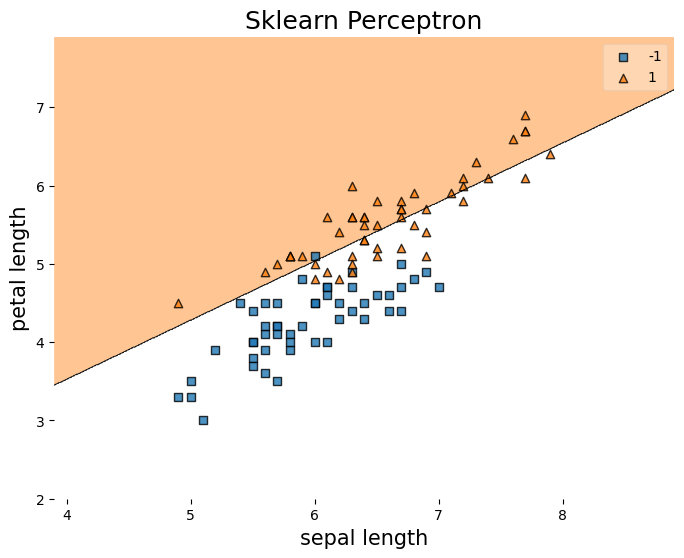

In [44]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

# Observations:
#### 1) The perceptron doesn't converge well as the data points cannot be separated by a single line. As we can see that the versicolor and virginica overlap with each other as shown in the graph,so the accuracy lesser than 100% that is 80%.
#### 2) Since 'versicolor' and 'virginica' are more similar to each other compared to 'setosa', the Perceptron might face more difficulty in finding a clear linear boundary between these two classes. The decision boundary might not be as distinct as it would be if 'setosa' were included.


---

# Question - b
#### We created My_Perceptron class for only 2 inputs. Extend this code for 3 inputs. Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing.

In [48]:
df = pd.read_csv("iris_dataset.csv") # reading the iris dataset
df = df.iloc[:100] # selecting first 100 rows in the dataframe
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [50]:
X = df[['sepal_length', 'sepal_width', 'petal_length']].to_numpy() # keep three attributes
X

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [52]:
y = df['species']
y = np.where(y == 'setosa', -1, 1) # replacing species names with numeric values (-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [54]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.w3 = np.random.rand(1) # added third weight
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.w3 = self.w3 - update*xi[2] # update third weight
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2, self.w3]) # concat third weight
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [56]:
clf = MyPerceptron()
clf.fit(X, y) #fitting the variables to the classifier

/var/folders/qj/h9pcnm497f3fht3l3qw6v5rw0000gn/T/ipykernel_31568/1753537335.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors = errors + int(update != 0)


In [58]:
y_pred = clf.predict(X)
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [60]:
mask = y == y_pred
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [62]:
print(f'Accuracy is {mask.sum()/mask.size*100}%')

Accuracy is 100.0%


# Conclusion :
#### 1) The `MyPerceptron` class was extended to handle 3 inputs and 3 features instead of just 2. Three features from the Iris dataset were selected to classify the 'Setosa' and 'Versicolor' classes. After fitting the data into the extended perceptron model, the accuracy was calculated, providing a measure of the model's performance.
#### 2) Although plotting the decision boundary is challenging due to the data being 3-dimensional, the comparison of actual labels with predicted labels showed that the model successfully distinguished between 'Setosa' and 'Versicolor.' The accuracy results indicate that the extended perceptron model is effective at handling and classifying data with three inputs and three features

---

# Question - c
#### Try to generalize My_Perceptron code so it could be used for any number of inputs. (Hint: Recall, that for a list ```w``` we can use ```w[-1]``` and ```w[:-1]``` to access the last value in the list and all the values expect the very last value. Also, use ``` np.dot```, NumPy dot product, to compute the pre-activation value of $z$.)

In [66]:
class ThePerceptron(MyPerceptron): # inherit old perceptron class
    def __init__(self, eta = 0.5, epochs = 50):
        super().__init__(eta, epochs) # call old init
        
    def fit(self, X, y):
        if type(X) == pd.core.frame.DataFrame: X = X.to_numpy() # dynamic datatype change
        self.w = np.random.rand(X.shape[1]) # dynamic weight sizing
        self.b = np.random.rand(1)
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            
            for xi, yi in zip(X, y):
                update = self.eta*(self.predict(xi) - yi)
                self.w -= update*xi # broadcast update
                self.b -= update
                errors += int(not update)
            
            if errors == 0: break
            else: self.errors.append(errors)
        return self
    
    def weighted_sum(self, x): return np.dot(x, self.w) + self.b # weights already concatenated

In [68]:
for i in range(0, 4):
    cols = np.random.choice(df.columns[:-1], i+1, False) # random indexing
    X = df[cols] # sample those cols
    print(f"Unit Test for {i+1} Input(s): {list(cols)}")
    
    try:
        clf = ThePerceptron().fit(X, y)
        mask = y == clf.predict(X).reshape(-1) # boolean 
        print(f'Test Passed! Accuracy: {mask.sum()/mask.size*100}%') # only prints if code runs with no error
        print(f'Weights: {clf.w}, Bias: {clf.b}\n')
    except: print('Test Failed...\n') # catch error

Unit Test for 1 Input(s): ['sepal_length']
Test Passed! Accuracy: 50.0%
Weights: [6.02733958], Bias: [-17.07979958]

Unit Test for 2 Input(s): ['sepal_length', 'petal_width']
Test Passed! Accuracy: 100.0%
Weights: [-1.01168396 11.31835542], Bias: [-3.07462558]

Unit Test for 3 Input(s): ['sepal_length', 'petal_width', 'sepal_width']
Test Passed! Accuracy: 100.0%
Weights: [ 1.35992495  4.37326319 -3.64847651], Bias: [-0.93234838]

Unit Test for 4 Input(s): ['petal_width', 'sepal_width', 'sepal_length', 'petal_length']
Test Passed! Accuracy: 100.0%
Weights: [ 2.81850562 -3.48180916 -0.48841705  5.69165993], Bias: [-0.90911069]



# Observation :
#### The `ThePerceptron` class extends `MyPerceptron` to handle any number of input features, initializing weights and biases dynamically. The `fit` method updates these parameters using broadcasting and includes early stopping based on error counts. The `weighted_sum` function computes the linear combination of inputs and weights using `np.dot`. The class is tested with random feature subsets from a DataFrame, with accuracy assessed and error handling implemented to manage potential issues during execution.